In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 1. Dataset 확인

In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_columns', None) # 모든 열 출력

df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.1 종속변수 분포

In [7]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

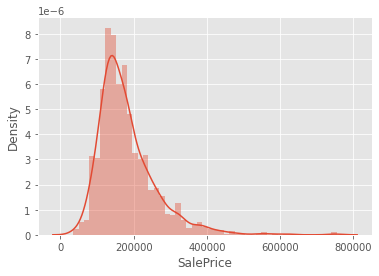

In [8]:
sns.distplot(df_train['SalePrice'])

In [9]:
# ID 변수 따로 떼어 놓기
id_test = df_test['Id']

## 1.2 결측치 확인

<AxesSubplot:>

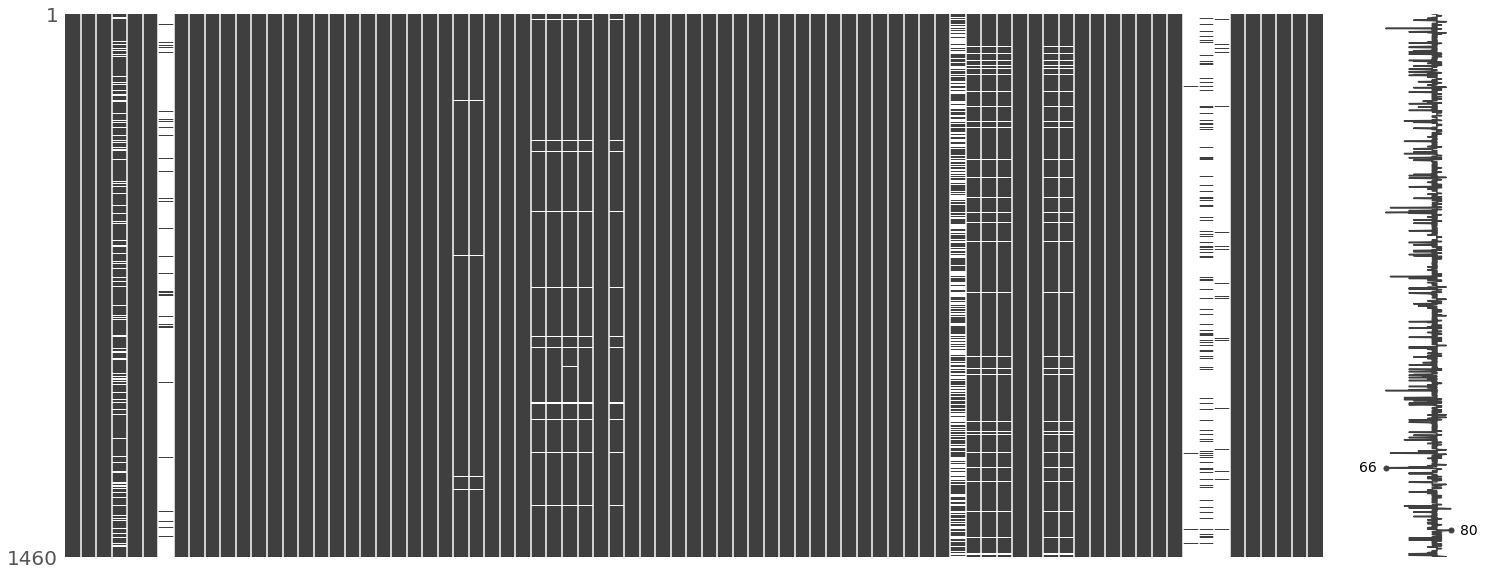

In [10]:
msno.matrix(df_train)

In [11]:
# 각 열의 NaN 비율 알아보기

for col in df_train.columns:
    if df_train[col].isnull().sum() > 0 :
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))

        print(msg)

column: LotFrontage	 Percent of NaN value: 17.74%
column:      Alley	 Percent of NaN value: 93.77%
column: MasVnrType	 Percent of NaN value: 0.55%
column: MasVnrArea	 Percent of NaN value: 0.55%
column:   BsmtQual	 Percent of NaN value: 2.53%
column:   BsmtCond	 Percent of NaN value: 2.53%
column: BsmtExposure	 Percent of NaN value: 2.60%
column: BsmtFinType1	 Percent of NaN value: 2.53%
column: BsmtFinType2	 Percent of NaN value: 2.60%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 47.26%
column: GarageType	 Percent of NaN value: 5.55%
column: GarageYrBlt	 Percent of NaN value: 5.55%
column: GarageFinish	 Percent of NaN value: 5.55%
column: GarageQual	 Percent of NaN value: 5.55%
column: GarageCond	 Percent of NaN value: 5.55%
column:     PoolQC	 Percent of NaN value: 99.52%
column:      Fence	 Percent of NaN value: 80.75%
column: MiscFeature	 Percent of NaN value: 96.30%


- LotFrontage (17.74%) : 직선 피트
- Alley (93.77%) : 골목 종류
- FireplaceQu (47.26%) : 벽난로의 질
- PoolQC (99.52%) : 풀의 질
- Fence (80.75%) : 울타리의 질
- MiscFeatrue (96.30%) : 이것저것 다양한 특징

In [12]:
for col in df_test.columns:
    if df_test[col].isnull().sum() > 0 :
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))

        print(msg)

column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:      Alley	 Percent of NaN value: 92.67%
column:  Utilities	 Percent of NaN value: 0.14%
column: Exterior1st	 Percent of NaN value: 0.07%
column: Exterior2nd	 Percent of NaN value: 0.07%
column: MasVnrType	 Percent of NaN value: 1.10%
column: MasVnrArea	 Percent of NaN value: 1.03%
column:   BsmtQual	 Percent of NaN value: 3.02%
column:   BsmtCond	 Percent of NaN value: 3.08%
column: BsmtExposure	 Percent of NaN value: 3.02%
column: BsmtFinType1	 Percent of NaN value: 2.88%
column: BsmtFinSF1	 Percent of NaN value: 0.07%
column: BsmtFinType2	 Percent of NaN value: 2.88%
column: BsmtFinSF2	 Percent of NaN value: 0.07%
column:  BsmtUnfSF	 Percent of NaN value: 0.07%
column: TotalBsmtSF	 Percent of NaN value: 0.07%
column: BsmtFullBath	 Percent of NaN value: 0.14%
column: BsmtHalfBath	 Percent of NaN value: 0.14%
column: KitchenQual	 Percent of NaN value: 0.07%
column: Functional	 Per

- LotFrontage (15.56%) : 직선 피트
- Alley (92.26%) : 골목 종류
- FireplaceQu (50.03%) : 벽난로의 질
- PoolQC (99.79%) : 풀의 질
- Fence (80.12%) : 울타리의 질
- MiscFeatrue (96.50%) : 이것저것 다양한 특징

<AxesSubplot:>

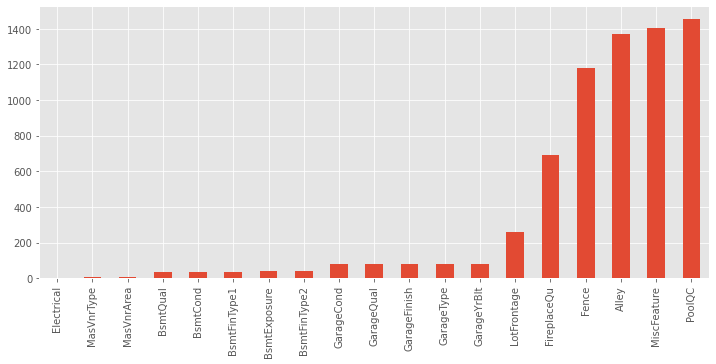

In [13]:
# null data 시각화
null_d = df_train.isnull().sum()
null_d = null_d[null_d>0]

null_d.sort_values(inplace=True)
null_d.plot.bar(figsize=(12, 5))

#### * 우리가 고려해야 할 NaN 값들


1. PoolQC (풀의 종류) - 풀이 없음
2. MiscFeature (기타 기능) - 기타 기능 없음
3. Alley (골목의 종류) - 골목 없음
4. Fence (울타리의 질) - 울타리 없음
5. FireplaceQu (벽난로의 질) - 벽난로 없음


- 위 feature들의 nan값들은 값이 저장되지 않은 것이 아니라 '없음'을 의미
    - 나중에 평균, 중앙값으로 대체하자


- 그 외 feature들의 nan 값은 제거하거나 0으로 대체

In [14]:
# categoric형 데이터와 numeric형 데이터 개수 확인

cat_features = df_train.dtypes[df_train.dtypes == 'object'].index
num_features = df_train.dtypes[df_train.dtypes != 'object'].index

print("categorical features: ", len(cat_features))
print("numeric features: ", len(num_features))

categorical features:  43
numeric features:  38


In [15]:
# categorical형 데이터
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# numeric형 데이터
num_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

> (+) 여기서 수치형 데이터이지만 범주형 의미를 가지는 feature를 처리해주자

<!-- - Id : 단순히 사용자를 구분하는 id -->
- MsSubClass : 빌딩 class
- OverallQual : 전체적인 quality
- OverallCond : 집 condition

In [17]:
cat_features = list(set(cat_features)) + list(set(["MSSubClass", "OverallQual", "OverallCond"]))
cat_features

['HouseStyle',
 'Neighborhood',
 'PoolQC',
 'ExterQual',
 'Heating',
 'GarageFinish',
 'LandSlope',
 'Condition2',
 'SaleCondition',
 'Exterior2nd',
 'Electrical',
 'BldgType',
 'BsmtQual',
 'KitchenQual',
 'LotConfig',
 'SaleType',
 'Exterior1st',
 'BsmtCond',
 'GarageCond',
 'BsmtExposure',
 'FireplaceQu',
 'Foundation',
 'HeatingQC',
 'MasVnrType',
 'PavedDrive',
 'Functional',
 'GarageQual',
 'Utilities',
 'Condition1',
 'CentralAir',
 'Alley',
 'BsmtFinType1',
 'MiscFeature',
 'Fence',
 'ExterCond',
 'LandContour',
 'BsmtFinType2',
 'MSZoning',
 'LotShape',
 'GarageType',
 'RoofMatl',
 'Street',
 'RoofStyle',
 'OverallQual',
 'MSSubClass',
 'OverallCond']

In [18]:
num_features = list(set(num_features) - set(["MSSubClass", "OverallQual", "OverallCond"]))
num_features

['GarageCars',
 'TotalBsmtSF',
 'LotFrontage',
 'MiscVal',
 'FullBath',
 'EnclosedPorch',
 'TotRmsAbvGrd',
 'YearBuilt',
 'LowQualFinSF',
 'MasVnrArea',
 'BsmtUnfSF',
 'WoodDeckSF',
 'BedroomAbvGr',
 'BsmtHalfBath',
 'GarageArea',
 '3SsnPorch',
 'LotArea',
 '1stFlrSF',
 'SalePrice',
 'YearRemodAdd',
 'KitchenAbvGr',
 'HalfBath',
 'OpenPorchSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'ScreenPorch',
 'PoolArea',
 'Fireplaces',
 'GrLivArea',
 'MoSold',
 'GarageYrBlt',
 '2ndFlrSF',
 'YrSold',
 'BsmtFullBath',
 'Id']

In [19]:
# 여기서 우리가 예측해야할 SalePrice는 따로 떼어주자
label = df_train["SalePrice"]

num_features = list(set(num_features) - set(["SalePrice"]))
num_features

['GarageCars',
 'TotalBsmtSF',
 'LotFrontage',
 'MiscVal',
 'FullBath',
 'EnclosedPorch',
 'TotRmsAbvGrd',
 'YearBuilt',
 'LowQualFinSF',
 'MasVnrArea',
 'BsmtUnfSF',
 'WoodDeckSF',
 'BedroomAbvGr',
 'BsmtHalfBath',
 'GarageArea',
 '3SsnPorch',
 'LotArea',
 '1stFlrSF',
 'YearRemodAdd',
 'KitchenAbvGr',
 'HalfBath',
 'OpenPorchSF',
 'BsmtFinSF2',
 'ScreenPorch',
 'BsmtFinSF1',
 'PoolArea',
 'Fireplaces',
 'GrLivArea',
 'MoSold',
 'GarageYrBlt',
 '2ndFlrSF',
 'YrSold',
 'BsmtFullBath',
 'Id']

## 1.3 이상치 확인 및 제거
- 사분위 범위(IQR, interquartiel range)를 기반으로
- IQR : 제 3사분위 - 제 1사분위
    - IQR = Q3 - Q1

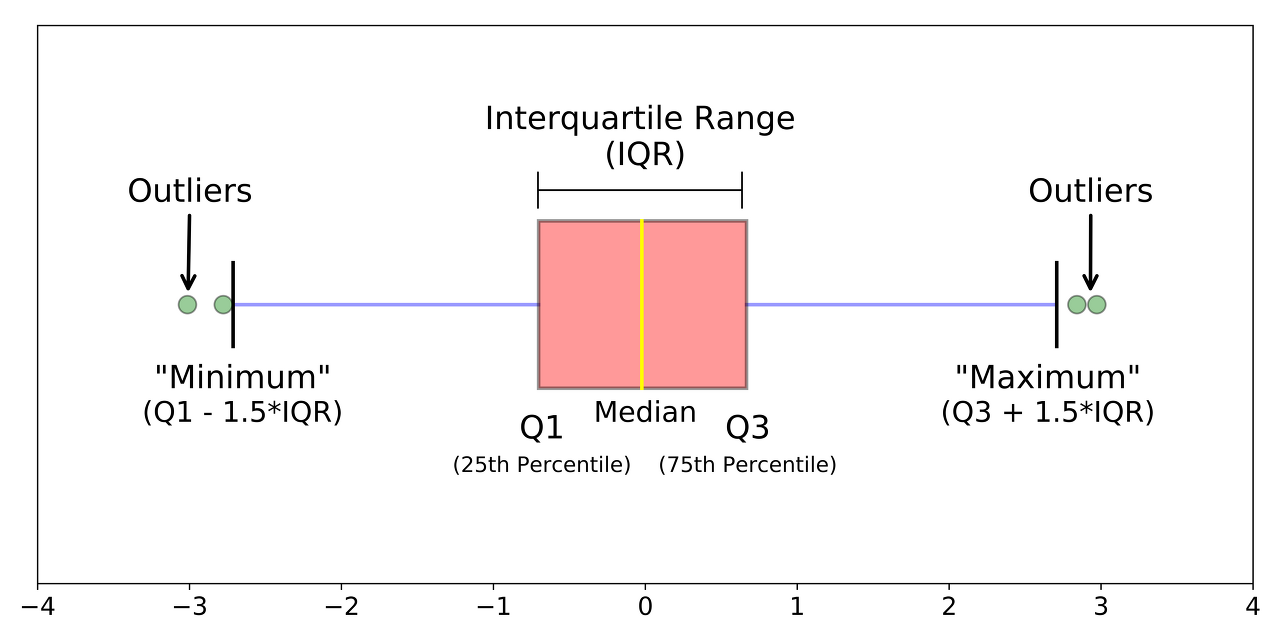!
(출처: https://hong-yp-ml-records.tistory.com/15)

In [20]:
# 이상치 탐색 및 제거 (튜키의 방법 이용)

from collections import Counter

def get_outlier(df, features):
    outlier_idx = []
    
    for col in features:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3-q1 # (상위 75% 지점의 값) - (하위 25% 지점의 값)
                    
        lower_bound = q1 - (iqr*1.5) # 최소 제한선
        upper_bound = q3 + (iqr*1.5) # 최대 제한선
        
        # 최소 제한선, 최대 제한선 넘어가는 값들을 가지는 컬럼을 이상치를 가지는 컬럼이라 생각
        outlier_col = df[(df[col]<lower_bound) | (df[col]>upper_bound)].index
        outlier_idx.extend(outlier_col) # 빈 인덱스에 이상치 가지는 컬럼 추가
        
    outlier_idx = Counter(outlier_idx) # 이상치 컬럼 개수 카운팅
    multiple_outliers = list(k for k, v in outlier_idx.items() if v>2) # 이상치가 2개 초과라면 outlier 리스트 생성
    
    return multiple_outliers


In [21]:
# 라벨 제외한 수치형 데이터
outlier_drop = get_outlier(df_train, num_features)

# outlier가 발생한 행 데이터 추출
df_train.loc[outlier_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
70,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,Ex,Y,SBrkr,2223,0,0,2223,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2,516,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1288,20,RL,NaN,36500,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,5,5,1964,1964,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,621.0,TA,Gd,CBlock,TA,TA,Av,Rec,812,Unf,0,812,1624,GasA,Fa,Y,SBrkr,1582,0,0,1582,0,1,2,0,4,1,TA,7,Typ,0,NaN,Attchd,1964.0,Unf,2,390,TA,TA,N,168,198,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,190000
1184,1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,226.0,TA,TA,CBlock,TA,TA,Gd,Rec,1159,Unf,0,413,1572,GasA,Gd,Y,SBrkr,1572,0,0,1572,1,0,1,1,3,1,TA,5,Typ,2,TA,2Types,1963.0,RFn,3,995,TA,TA,Y,0,263,0,0,263,0,NaN,NaN,NaN,0,5,2007,WD,Normal,186700
1346,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297,Rec,68,1203,1568,GasA,TA,Y,SBrkr,2156,0,0,2156,0,0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2,508,Gd,TA,Y,0,80,0,290,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,262500
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,5,1965,1979,Flat,Tar&Grv,Plywood,Plywood,BrkCmn,113.0,TA,Gd,CBl

In [22]:
# 이상치 포함된 행 제거
df_train = df_train.drop(outlier_drop, axis=0)
df_train.shape

# reset_index : 인덱스 값을 컬럼으로 만들어줌
# drop=True : 원본의 인덱스 대체 (drop하고 새로)

# 행이 1460 -> 1370 로 감소함

(1370, 81)

In [23]:
print(df_train.shape, df_test.shape)

(1370, 81) (1459, 80)


## 1.3 수치형 데이터 결측치에 값 처리하기

In [24]:
# 수치형 데이터 - nan 값은 mean으로 대체 (이상치 제거 했으므로)

for col in num_features:
    if df_train[col].isnull().sum() > 0 :
        df_train[col] = df_train[col].fillna(df_train[col].mean())

for col in num_features:
    if df_test[col].isnull().sum() > 0 :
        df_test[col] = df_test[col].fillna(df_test[col].mean())

# 2. EDA
## 2.1 상관관계 분석 (수치형 데이터)
- 수치형 변수 -> 상관관계
- 범주형 변수 -> boxplot?
- saleprice와 관계가 큰/작은 feature 나누기

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

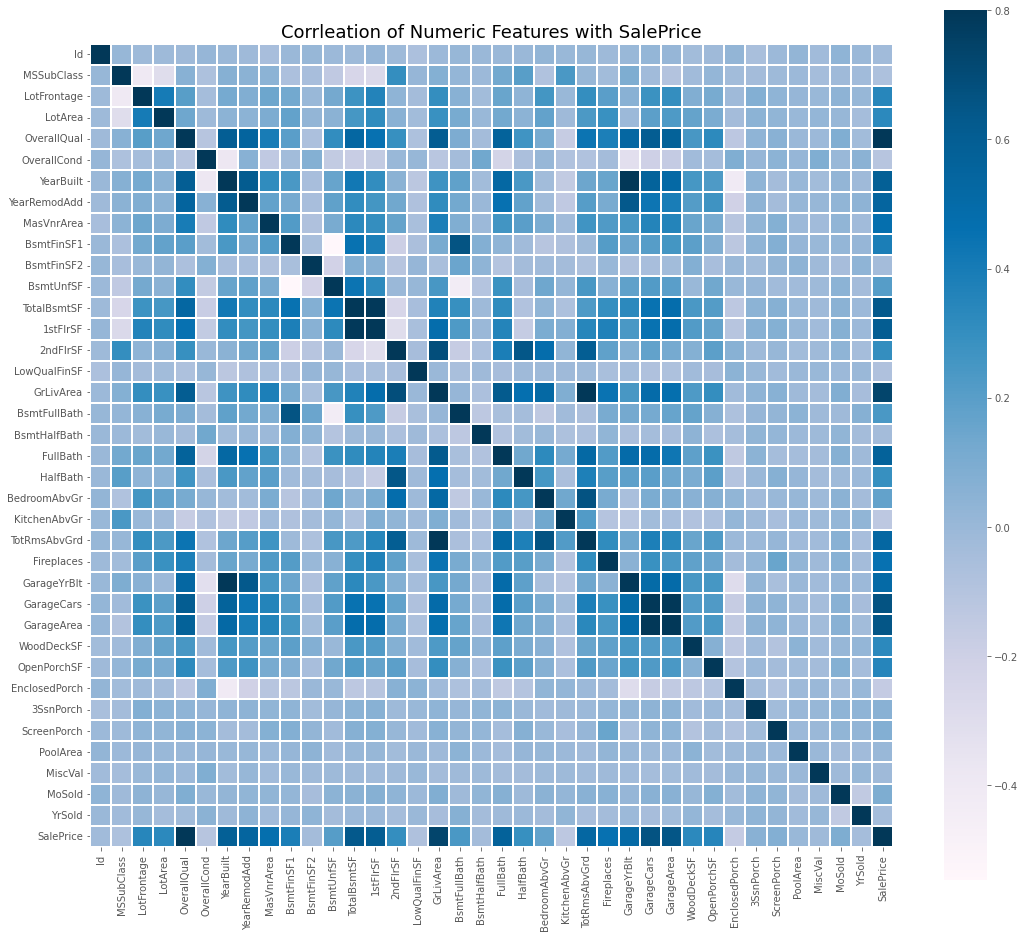

In [25]:
# 수치형 data
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

colormap = plt.cm.PuBu

fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(corr_data.corr(),
            vmax=.8, # 컬러바 최대 크기
            linewidths=0.1, # 경계면 실선으로 구분하기
            square=True,
            annot=False, # 실제값 표시 x
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

> (+) heatmap으로는 상관관계가 한 눈에 들어오지 않으므로 barplot으로 그려보자

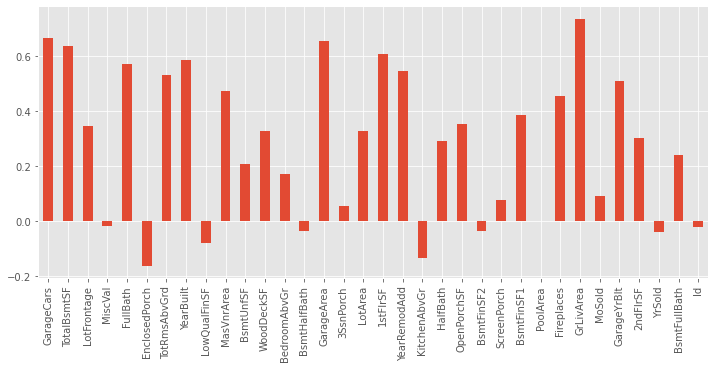

In [26]:
# 여기서 SalePrice가 안 들어갔으면 더 좋았을 듯

plt.figure(figsize=(12, 5))

df_train.corr()["SalePrice"][num_features].plot.bar()
plt.show()

- 상관관계가 너무 낮은 feature : SalePrice 예측에 도움이 안 됨

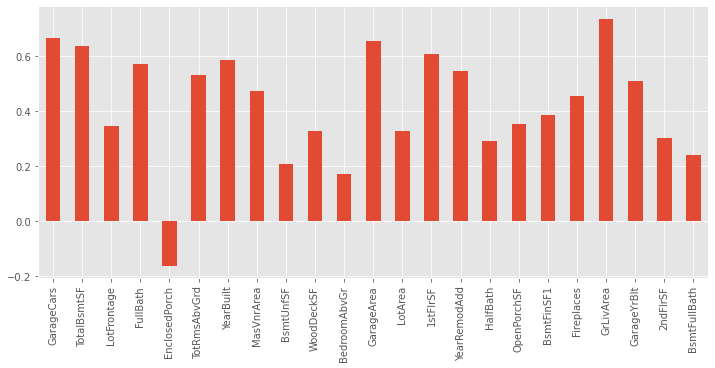

In [27]:
# 상관관계가 0.15 이상인 column들만
num_features = list(filter(lambda x: abs(df_train.corr()["SalePrice"][x]) > 0.15, num_features))

plt.figure(figsize=(12, 5))
df_train.corr()["SalePrice"][num_features].plot.bar()
plt.show()

# 내림차순 정렬?

#### * SalePrice(타겟)와 상관관계가 깊은 feature들 확인

- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- YearBuilt
- FullBath
- YearRemodAdd
- TotRmsAbvGrd
- ...

1. GrLivArea는 지상 ground의 넓이다. 각 층과 화장실의 넓이를 나타내는 1stFlrSF, 2ndFlrSF, FullBath를 삭제
2. Garage가 넓으면 car도 많이 수용할 수 있을 것이다. 따라서 둘 중 하나만 사용하자 (상관관계가 더 낮은 GargeArea는 삭제)
3. TotalBsmtSF는 지하실의 넓이를 나타낸다. 따라서 이와 관계있는 BsmtUnfSF, BsmtFinSF1, BsmtHalfBath, BsmtFullBath는 삭제


----

즉, 1stFlrSF, 2ndFlrSF, FullBath, GarageArea, BsmtUnfSF, BsmtFinSF1, BsmtHalfBath, BsmtfFullBath 컬럼은 삭제하자

<!-- - OverallQual
- GrLivArea
- GarageCars
- YearBuilt / YearRemodAdd / FullBath / TotalBsmtSF / 1stFlrSF / GarageArea -->


<!-- #### * 서로 상관관계가 높은 feature들 확인
- GarageYrBlt & YearBuilt
- TotRmsAbvGrd & GrLivArea
- 1stFlrSF & TotalBsmtSF
 -->

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

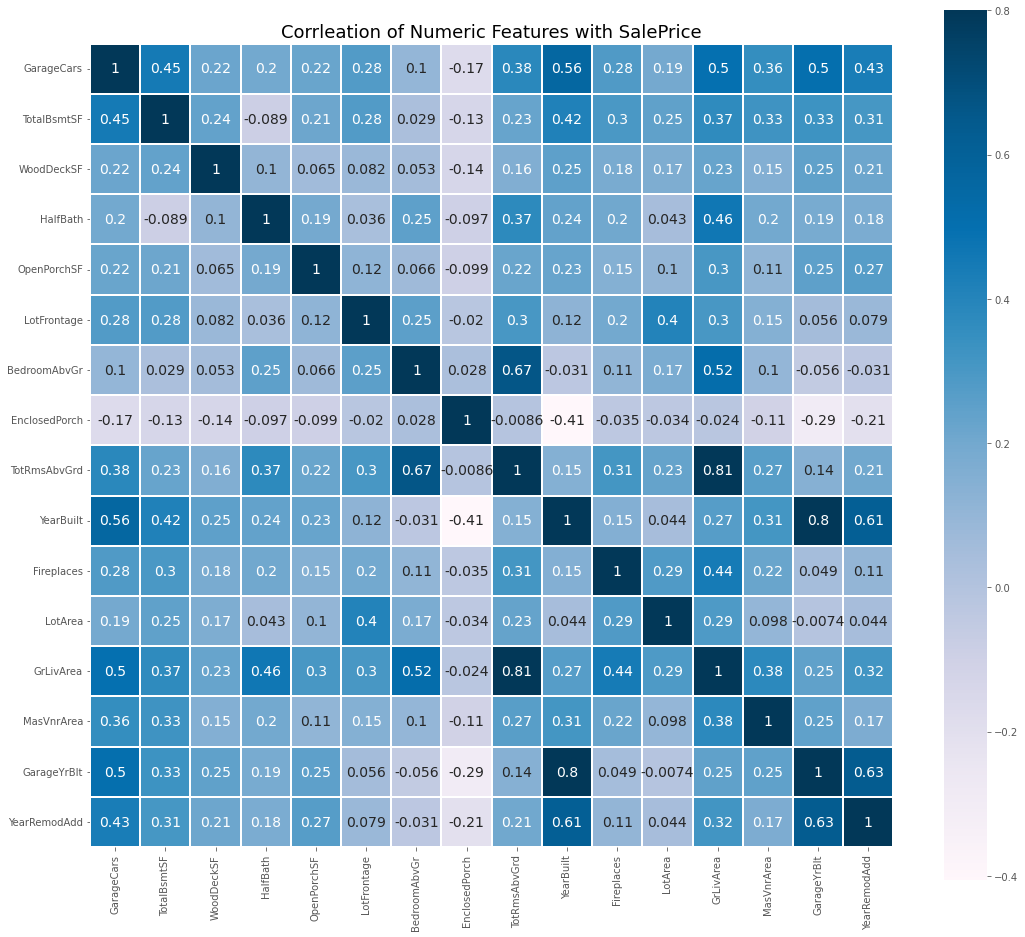

In [28]:
num_features = list(set(num_features) - set(["1stFlrSF", "2ndFlrSF", "GarageArea", "FullBath", "BsmtUnfSF", "BsmtFinSF1", "BsmtHalfBath", "BsmtFullBath"]))

colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[num_features].corr(),
            vmax=.8, # 컬러바 최대 크기
            linewidths=0.1, # 경계면 실선으로 구분하기
            square=True,
            annot=True, # 실제값 표시 o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

#### * 서로 상관관계가 높은 features들
1. YearBuilt와 GarageYrBlt의 상관관계가 1에 가깝다. 집이 지어졌을 때와 차고가 지어졌을 때의 연도는 비슷할 것이므로 SalePrice와 상관관계가 상대적으로 작은 GarageYrBlt를 삭제
2. GrLivArea와 TotRmsAbvGrd의 상관관계가 1에 가깝다. 집의 넓이와 방의 계수는 비례할 것이므로 상대적으로 상관관계가 낮은 TotRmsAbvGrd를 삭제
3. YearBuilt와 YearRemodAdd의 상관관계가 0.6를 넘는다. 집이 지어진 연도와 리모델링 된 연도는 비례할 것이다. 상대적으로 상관관계가 낮은 YearRemodAdd를 삭제

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

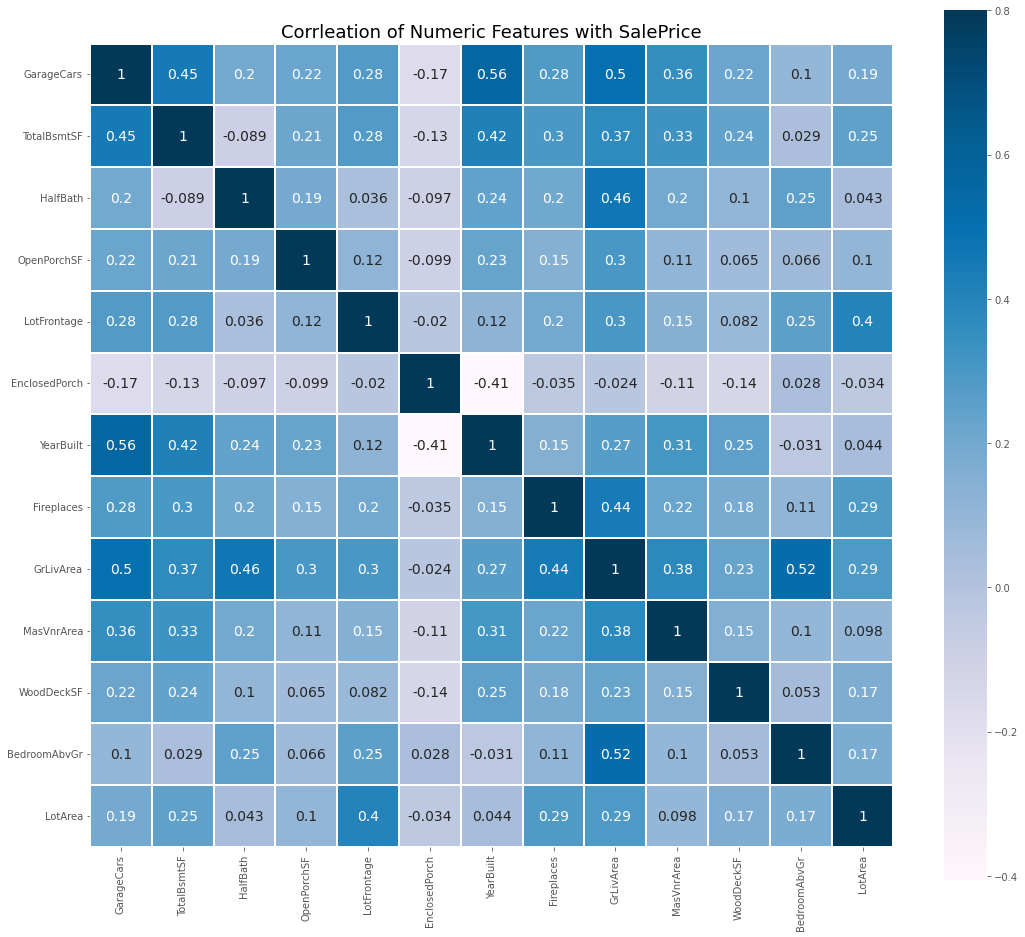

In [29]:
num_features = list(set(num_features) - set(["GarageYrBlt", "TotRmsAbvGrd", "YearRemodAdd"]))

colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[num_features].corr(),
            vmax=.8, # 컬러바 최대 크기
            linewidths=0.1, # 경계면 실선으로 구분하기
            square=True,
            annot=True, # 실제값 표시 o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

## 2.2 상관관계 분석 (범주형 데이터)

In [30]:
null_cat = []
for col in cat_features:
    if df_train[col].isnull().sum() > 0:
        null_cat.append(col)
print(null_cat)
print("\nNull data를 가진 범주형 데이터의 수: ", len(null_cat))

['PoolQC', 'GarageFinish', 'Electrical', 'BsmtQual', 'BsmtCond', 'GarageCond', 'BsmtExposure', 'FireplaceQu', 'MasVnrType', 'GarageQual', 'Alley', 'BsmtFinType1', 'MiscFeature', 'Fence', 'BsmtFinType2', 'GarageType']

Null data를 가진 범주형 데이터의 수:  16


- Electrical와 MasVnrType은 no data 의미의 NA가 아닌 단순한 결측치

In [31]:
null_cat = list(set(null_cat) - set(["Electrical", "MasVnrType"]))
print(null_cat)
print("\nNull data를 가진 범주형 데이터의 수: ", len(null_cat))

['PoolQC', 'GarageQual', 'GarageFinish', 'Alley', 'BsmtFinType1', 'MiscFeature', 'Fence', 'BsmtQual', 'BsmtFinType2', 'BsmtCond', 'GarageCond', 'BsmtExposure', 'GarageType', 'FireplaceQu']

Null data를 가진 범주형 데이터의 수:  14


In [32]:
# 범주형 데이터 - 결측치 'None'으로 대체하기
# 나중에 랜덤포레스트를 이용해 대체 가능?

for col in cat_features:
    df_train[col] = df_train[col].fillna('None')

for col in cat_features:
    df_test[col] = df_test[col].fillna('None')

In [33]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

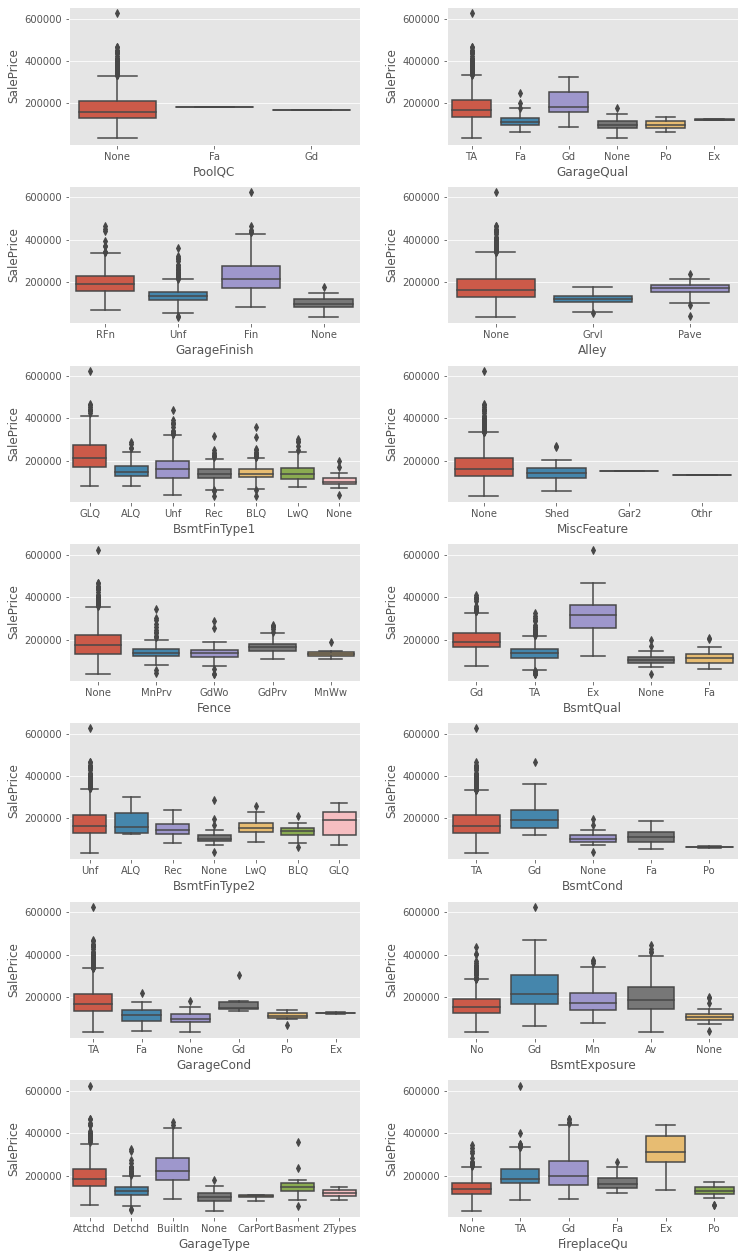

In [34]:
# None이 있는 범주형 데이터
f, ax = plt.subplots(7, 2, figsize=(12, 21))

for r in range(0, 7):
    for c in range(0, 2):
        i = r*2+c
        col = null_cat[i]
        sns.boxplot(x=col, y="SalePrice", data=df_train, ax=ax[r][c])
        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

1. PoolQC, MiscFeature, Alley, Fence 대부분이 None이다.
    - 그래프에서 존재하지 않는 경우가 유의미함을 나타낸다. -> 삭제하기
2. BsmtFinType2, BmstFinType1는 그렇게 유의미한 의미를 가지지 않음 -> 삭제

In [35]:
cat_features = list(set(cat_features) - set(null_cat))
print(len(cat_features))

32


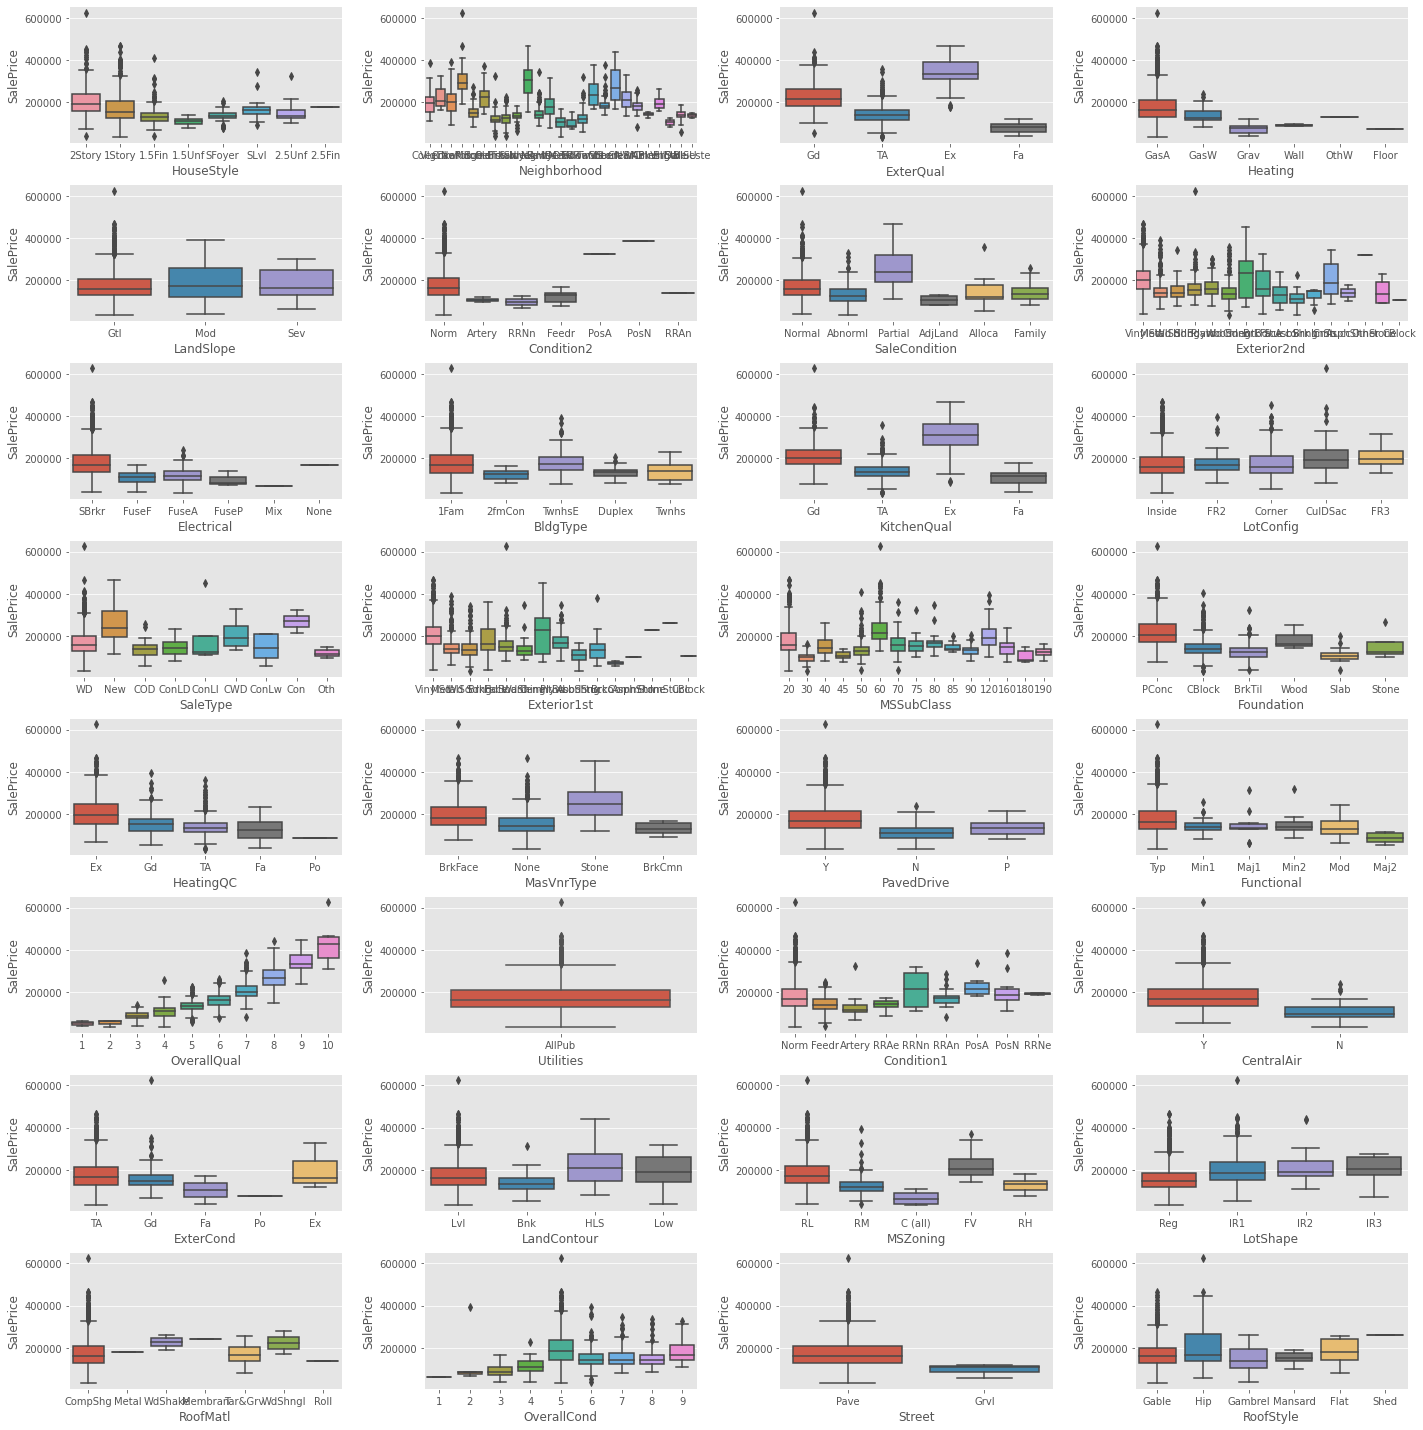

In [36]:
# None이 없는 범주형 데이터
f, ax = plt.subplots(8, 4, figsize=(24, 24))

for r in range(0, 8):
    for c in range(0, 4):
        i = r*4+c
        col = cat_features[i]
        sns.boxplot(x=col, y="SalePrice", data=df_train, ax=ax[r][c])
        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

- LandSlope, BldgType, RoofMatl, Utilities는 썩 관계 없어보임 -> 삭제

In [37]:
cat_features = list(set(cat_features) - set(["PoolQC", "MiscFeature", "Alley", "Fence", "BsmtFinType2", "BmstFinType1",
                                            "LandSlope", "BldgType", "RoofMatl", "Utilities"]))

In [38]:
cat_features

['HouseStyle',
 'Neighborhood',
 'ExterQual',
 'Heating',
 'Condition2',
 'SaleCondition',
 'Exterior2nd',
 'Electrical',
 'KitchenQual',
 'LotConfig',
 'SaleType',
 'Exterior1st',
 'MSSubClass',
 'Foundation',
 'HeatingQC',
 'MasVnrType',
 'PavedDrive',
 'Functional',
 'OverallQual',
 'Condition1',
 'CentralAir',
 'ExterCond',
 'LandContour',
 'MSZoning',
 'LotShape',
 'OverallCond',
 'Street',
 'RoofStyle']

In [39]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [40]:
# 여기서 df_test에 null값이 저장된다 ,,😕

keys = []
for col in cat_features:
    keys = df_train[[col, "SalePrice"]].groupby(col).mean().sort_values("SalePrice").apply(dict).to_dict()["SalePrice"].keys()
    keys = list(keys)
    df_train[col] = df_train[col].apply(lambda x: np.nan if x not in keys else keys.index(x))
    df_test[col] = df_test[col].apply(lambda x: np.nan if x not in keys else keys.index(x))

df_train[cat_features].dtypes

HouseStyle       int64
Neighborhood     int64
ExterQual        int64
Heating          int64
Condition2       int64
SaleCondition    int64
Exterior2nd      int64
Electrical       int64
KitchenQual      int64
LotConfig        int64
SaleType         int64
Exterior1st      int64
MSSubClass       int64
Foundation       int64
HeatingQC        int64
MasVnrType       int64
PavedDrive       int64
Functional       int64
OverallQual      int64
Condition1       int64
CentralAir       int64
ExterCond        int64
LandContour      int64
MSZoning         int64
LotShape         int64
OverallCond      int64
Street           int64
RoofStyle        int64
dtype: object

In [41]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 12)

In [42]:
for col in cat_features:
    if df_test[col].isnull().sum().sum() > 0 :
        df_test[col] = df_test[col].fillna(df_train[col].median())
    
    
# for col in num_features:
#     if df_train[col].isnull().sum() > 0 :
#         df_train[col] = df_train[col].fillna(df_train[col].mean())

In [43]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

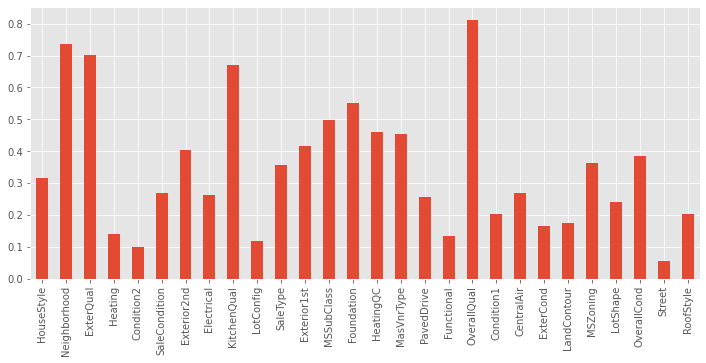

In [44]:
# 눈으로보단 좀 더 정확히 그래프로
plt.figure(figsize=(12, 5))

df_train.corr()["SalePrice"][cat_features].plot.bar()
plt.show()

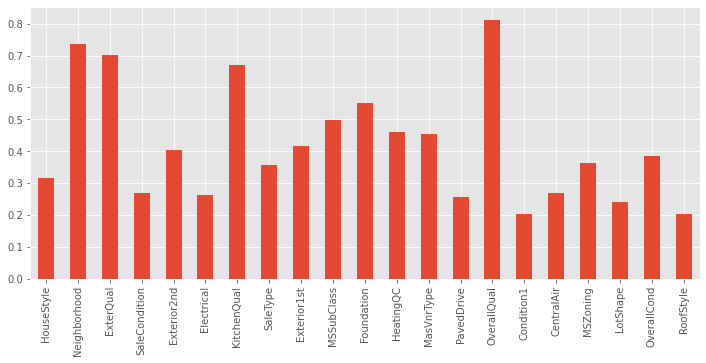

In [45]:
cat_features = list(filter(lambda x: abs(df_train.corr()["SalePrice"][x]) > 0.2, cat_features))

plt.figure(figsize=(12, 5))

df_train.corr()["SalePrice"][cat_features].plot.bar()
plt.show()

OverallQual, Neighborhood, ExterQual, KitchenQual, Foundation, MSSubClass, HeatingQC, MasVnrType, ... 순으로 상관관계가 높다.

하지만 이들 서로서로 사이에도 상관관계가 높을 수 있으므로 heatmap을 그려 확인해보자

<AxesSubplot:title={'center':'Corrleation of Categorical Features with SalePrice'}>

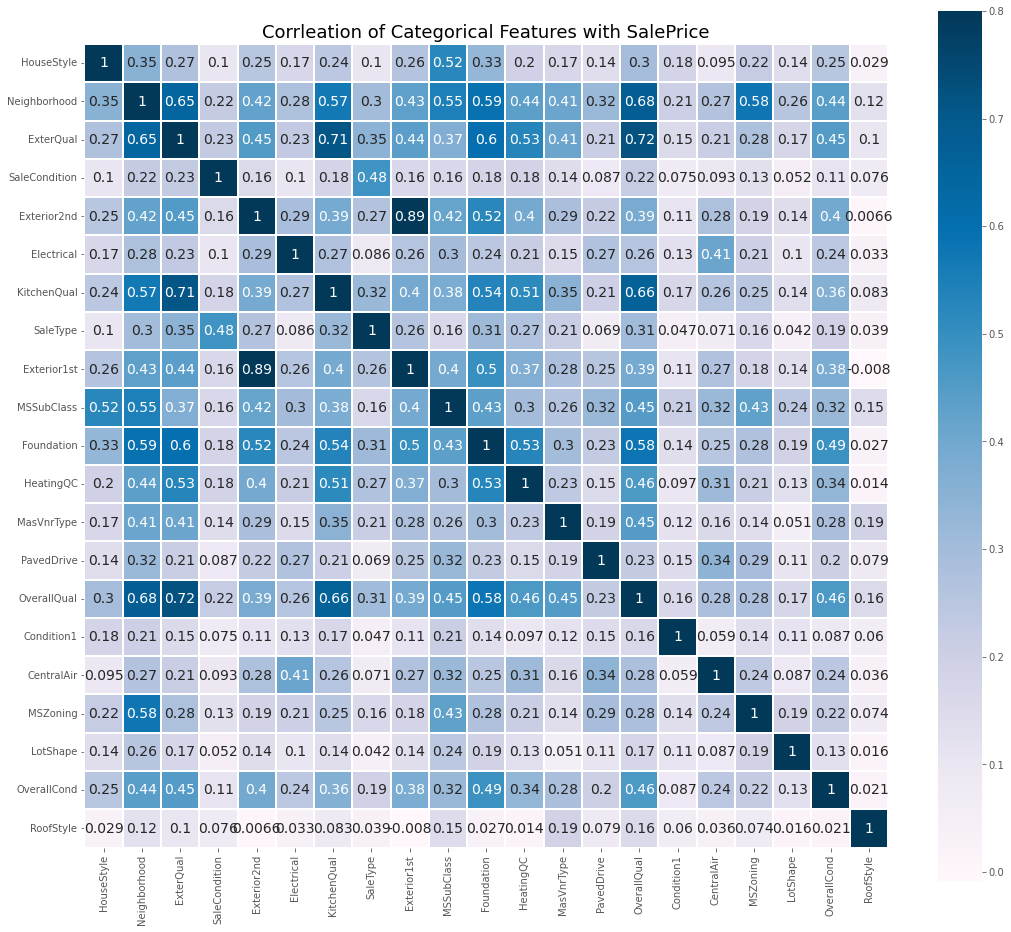

In [46]:
colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Categorical Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[cat_features].corr(),
            vmax=.8, # 컬러바 최대 크기
            linewidths=0.1, # 경계면 실선으로 구분하기
            square=True,
            annot=True, # 실제값 표시 o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

0.6 이상 삭제
1. OverallQual & ExterQual -> ExterQual 삭제
2. OverallQual & Neighborhood -> Neighborhood 삭제
3. OverallQual & KitchenQual -> KitchenQual 삭제
4. Exterior2nd & Exterior1st -> Exterior2nd 삭제

<AxesSubplot:title={'center':'Corrleation of Categorical Features with SalePrice'}>

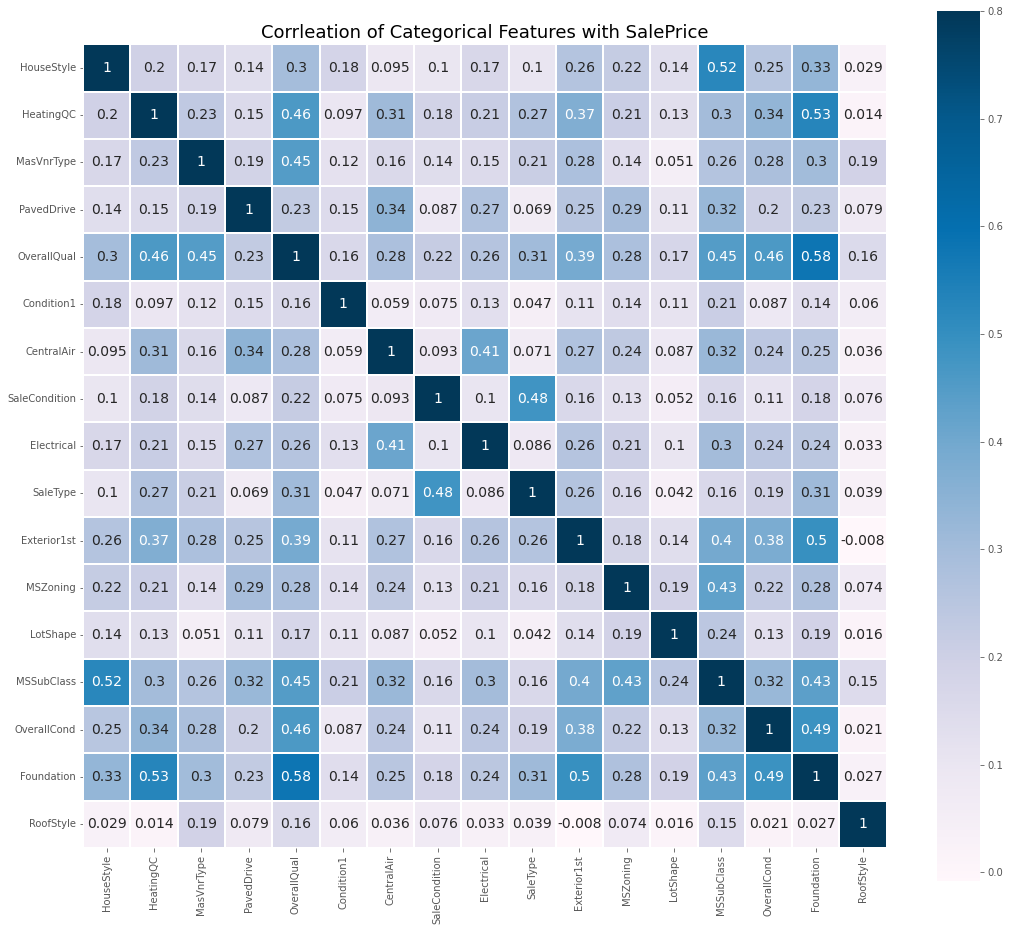

In [47]:
cat_features = list(set(cat_features) - set(["ExterQual", "Neighborhood", "KitchenQual", "Exterior2nd"]))

colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Categorical Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[cat_features].corr(),
            vmax=.8, # 컬러바 최대 크기
            linewidths=0.1, # 경계면 실선으로 구분하기
            square=True,
            annot=True, # 실제값 표시 o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

In [48]:
# 수치형 데이터
neither = list(set(df_train.columns) - set(num_features) - set(cat_features) - {"SalePrice"})
print("수치형 데이터: ", num_features)
print("\n범주형 데이터: ", cat_features)
print("\n약한 데이터: ", neither)

수치형 데이터:  ['GarageCars', 'TotalBsmtSF', 'HalfBath', 'OpenPorchSF', 'LotFrontage', 'EnclosedPorch', 'YearBuilt', 'Fireplaces', 'GrLivArea', 'MasVnrArea', 'WoodDeckSF', 'BedroomAbvGr', 'LotArea']

범주형 데이터:  ['HouseStyle', 'HeatingQC', 'MasVnrType', 'PavedDrive', 'OverallQual', 'Condition1', 'CentralAir', 'SaleCondition', 'Electrical', 'SaleType', 'Exterior1st', 'MSZoning', 'LotShape', 'MSSubClass', 'OverallCond', 'Foundation', 'RoofStyle']

약한 데이터:  ['Neighborhood', 'PoolQC', 'ExterQual', 'Heating', 'GarageFinish', 'MiscVal', 'FullBath', 'LandSlope', 'TotRmsAbvGrd', 'Condition2', 'LowQualFinSF', 'Exterior2nd', 'BldgType', 'BsmtUnfSF', 'BsmtQual', 'KitchenQual', 'LotConfig', 'BsmtHalfBath', 'BsmtCond', 'GarageCond', 'GarageArea', 'BsmtExposure', '3SsnPorch', '1stFlrSF', 'FireplaceQu', 'YearRemodAdd', 'KitchenAbvGr', 'Functional', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageQual', 'Utilities', 'PoolArea', 'Alley', 'BsmtFinType1', 'MiscFeature', 'MoSold', 'GarageYrBlt', 'ExterCond', '

In [49]:
drop_col = neither

df_train.drop(drop_col, axis=1, inplace=True)
df_test.drop(drop_col, axis=1, inplace=True)

In [50]:
df_train.shape, df_test.shape

((1370, 31), (1459, 30))

## 제대로!!

In [51]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):
    
    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
    
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값, 실제값에 +1하고 로그를 씌우기
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # (예측값 - 실제값)의 제곱
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균
    mean_difference = difference.mean()
    
    # 루트
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

Skewness: 1.281826
Kurtosis: 2.517524


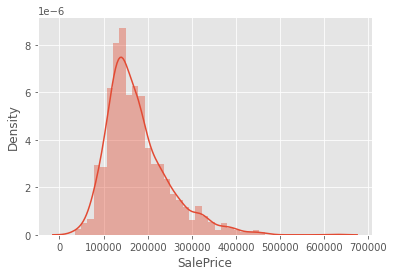

In [52]:
label_name = "SalePrice"
sns.distplot(df_train[label_name])

print("Skewness: %f" % df_train[label_name].skew())
print("Kurtosis: %f" % df_train[label_name].kurt())

Skewness: -0.048061
Kurtosis: 0.607613


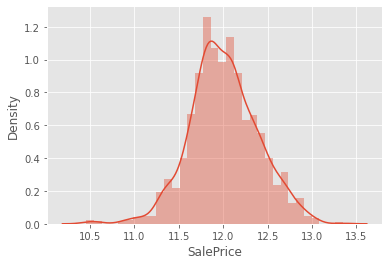

In [53]:
# 로그 취하기

df_train[label_name] = df_train[label_name].map(lambda i: np.log(i) if i>0 else 0)
sns.distplot(df_train[label_name])

print("Skewness: %f" % df_train[label_name].skew())
print("Kurtosis: %f" % df_train[label_name].kurt())

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = df_train.drop(label_name, axis=1).values
target = df_train[label_name].values # 예측할 값
X_test = df_test.values

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target, test_size=0.2, random_state=42)

In [55]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7)
regressor.fit(X_tr, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=3,
             min_child_weight=1.8, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.52,
             tree_method='exact', validate_parameters=1, verbosity=None)

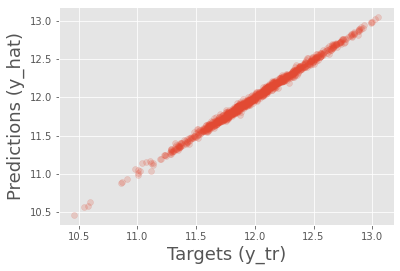

In [56]:
y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

In [57]:
# 정확도
regressor.score(X_tr, y_tr)

0.9952521728908389

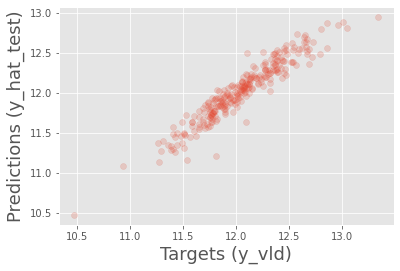

In [58]:
y_hat_test = regressor.predict(X_vld)

plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [59]:
regressor.score(X_vld, y_vld)

0.9009342768482175

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_tr, y=y_tr, cv=10)

In [61]:
print(accuracies.mean())
print(accuracies.std())

0.8791691249939957
0.020956397237920733


In [62]:
pred = regressor.predict(X_test)

sub = pd.DataFrame()
sub['Id'] = id_test
sub['SalePrice'] = pred
sub['SalePrice'] = np.exp(sub['SalePrice'])

sub.to_csv('sub.csv', index=False)


In [63]:
id_test.shape, pred.shape

((1459,), (1459,))